In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
import numpy as np
import cv2
import yaml

In [2]:
IMAGE_FOLDER = "/home/lwecke/Datensätze/Datensatz_v1_50p_3reg/Bulktraining_Outputs/Lenet5_kroger_5epochs_2023_11_08/yaw/yaw_0.918367326259613"

image_paths=[]
for filename in os.listdir(IMAGE_FOLDER):
    file_path = os.path.join(IMAGE_FOLDER, filename)
    if not os.path.isdir(file_path):
        if "gradcam" not in file_path:
            continue
        image_paths.append(file_path)
print(image_paths)

image_dict = {}
for image_path in image_paths:
    # Load the image
    img = cv2.imread(image_path)

    # Check if the image was correctly loaded
    if img is not None:
        # Convert the image to RGB
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Store the image data in the dictionary
        # Use the image path as the key and the RGB data as the value
        image_dict[image_path] = img_rgb
# Adjust the size of the figure
fig = plt.figure(figsize=(20,40))

['/home/lwecke/Datensätze/Datensatz_v1_50p_3reg/Bulktraining_Outputs/Lenet5_kroger_5epochs_2023_11_08/yaw/yaw_0.918367326259613/gradcamPP_mean_Img_yaw0.9183673.png']


<Figure size 2000x4000 with 0 Axes>

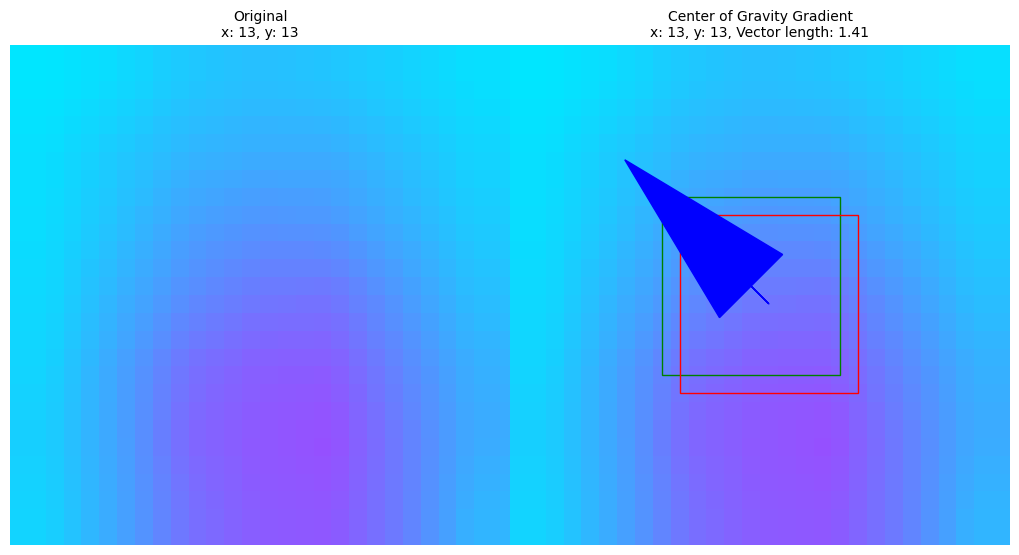

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
import numpy as np
import cv2

# Adjust the size of the figure
fig = plt.figure(figsize=(10,60))

for idx, (image_path, image) in enumerate(image_dict.items()):
    if "gradcam" not in image_path:
        continue
    img = mpimg.imread(image_path)

    # If the image was not correctly loaded, return None
    if img is None:
        print("Image not found at path:", image_path)
        continue

    # Convert the image to grayscale
    grayscale_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # Compute the weighted average of the pixel coordinates
    height, width = grayscale_img.shape
    x_coords, y_coords = np.meshgrid(np.arange(width), np.arange(height))
    total_weight = np.sum(grayscale_img)
    avg_x = np.sum(x_coords * grayscale_img) / total_weight
    avg_y = np.sum(y_coords * grayscale_img) / total_weight

    # Round the average coordinates
    avg_x_rounded = round(avg_x)
    avg_y_rounded = round(avg_y)

    # Compute the center of the image
    center_x = round(width / 2)
    center_y = round(height / 2)

    # Compute the vector from the center of the image to the center of gravity
    vector_x = avg_x_rounded - center_x
    vector_y = avg_y_rounded - center_y
    vector_length = np.sqrt(vector_x**2 + vector_y**2)

    # Plot the original image
    ax1 = fig.add_subplot(len(image_dict), 2, 2*idx+1)
    ax1.imshow(img)
    ax1.axis('off')
    ax1.set_title(f"Original\nx: {avg_x_rounded}, y: {avg_y_rounded}", fontsize=10, loc='center')

    # Plot the image with the center of gravity marked
    ax2 = fig.add_subplot(len(image_dict), 2, 2*idx+2)
    ax2.imshow(img)

    # Draw a green square at the center of gravity
    rect_gravity = patches.Rectangle((avg_x_rounded-5, avg_y_rounded-5), 10, 10, linewidth=1, edgecolor='g', facecolor='none')
    ax2.add_patch(rect_gravity)

    # Draw a red square at the center of the image
    rect_image = patches.Rectangle((center_x-5, center_y-5), 10, 10, linewidth=1, edgecolor='r', facecolor='none')
    ax2.add_patch(rect_image)

    # Draw a blue arrow from the center of the image to the center of gravity
    ax2.arrow(center_x, center_y, vector_x, vector_y, head_width=5, head_length=10, fc='blue', ec='blue')

    ax2.axis('off')
    ax2.set_title(f"Center of Gravity Gradient\nx: {avg_x_rounded}, y: {avg_y_rounded}, Vector length: {vector_length:.2f}", fontsize=10, loc='center')

plt.tight_layout(pad=0)
plt.show()